In [1]:
import numpy as np

import tensorflow as tf
import tensorflow.keras as ks
from tensorflow.keras.layers import Flatten,Activation,Dense,Dropout,Rescaling,Convolution2D, MaxPooling2D

import seaborn as sb
import matplotlib.pyplot as plt
import PIL
from PIL import Image,ImageOps # para hacer el resize de las imagenes.

# paquetes de paths
import glob
import os
from os import listdir, walk
from os.path import isfile, join

En al compañia de seguros Aces Dominicana, se ha creado un nuevo producto de seguros de veterinario para perros y gatos. en el cual se ha calculado, que la prima del produto varía mas por el hecho de ser un perro o garo, que por la raza del animas.

En ese sentido, se le solicitó al departamento de ciencia de datos de la compañía que creara un modelo quepudiera identificar entre una foto subida por el cliente, si era un perro o un gato para poder tarificar el seguro, puesto que junto con el producto, se comercializó una plataforma por whatsapp por la cual el asegurado puede eviar la foto de su mascota.

Para esto usaremos una base de datos de imagenes que contiene 981 imagenes de perros y gatos para entrenamiento y 2001 imagenes de perros  y gatos para prueba.

In [2]:
data_path = 'C:/Users/Al_cstillo/Documents/nn_data/sample'

Esta ruta contiene 2 carpetas, trn y tst, que corresponden a los sets de entrenamiento y de validación respectivamente. cada cual contiene 2 carpetas cat, dog, las cuales contienen imagenes mixtas de gatos y perros.

In [3]:
# Data features
categorias=[]
labels={}
for dirname, dirnames, filenames in walk(join(data_path,'trn')):
    # Estudia todos los subdirectorios para ver las categorias.
    for i,subdirname in enumerate(dirnames):
        categorias += [subdirname]
        labels[i] = subdirname
print('categorias: ', categorias)

n_classes = len(categorias)
print('Num classes: ', n_classes)

categorias:  ['cat', 'dog']
Num classes:  2


In [4]:
#Consiguiendo la data
batch_size = 32
img_height = 500
img_width = 500

train_ds = tf.keras.utils.image_dataset_from_directory(
  os.path.join(data_path,'trn'),
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1962 files belonging to 2 classes.
Using 1570 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  os.path.join(data_path,'tst'),
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4032 files belonging to 2 classes.
Using 806 files for validation.


In [9]:
#ahora definimos el modelo
kernel_size = 3 # Size of the kernel for the convolution layers
pool_size = 2 # Size of the pooling region for the pooling layers

red_neuronal=ks.models.Sequential()
red_neuronal.add(Rescaling(1./255))
red_neuronal.add(Convolution2D(8, kernel_size, activation='relu'))
red_neuronal.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
red_neuronal.add(Convolution2D(16, kernel_size, activation='relu'))
red_neuronal.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
red_neuronal.add(Convolution2D(32, kernel_size, activation='relu'))
red_neuronal.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
red_neuronal.add(Convolution2D(64, kernel_size, activation='relu'))
red_neuronal.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
red_neuronal.add(Dropout(0.1))
#para que el output sea un vector de 2 valores. 
red_neuronal.add(Flatten())
red_neuronal.add(Dense(2))
red_neuronal.add(Activation('sigmoid'))

In [12]:
red_neuronal.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [14]:
epochs = 25
historial=red_neuronal.fit(
    train_ds, # Data de entrenamiento
    validation_data=val_ds, # tags de los animalitos
    batch_size=128, # numero de batch
    epochs=epochs, # epocas
    callbacks=[tensorboard_callback]
)

Epoch 1/25
50/50 [==============================] - 204s 4s/step - loss: 0.6552 - accuracy: 0.5898 - val_loss: 0.6669 - val_accuracy: 0.6067
Epoch 2/25
50/50 [==============================] - 195s 4s/step - loss: 0.6205 - accuracy: 0.6459 - val_loss: 0.6605 - val_accuracy: 0.5980
Epoch 3/25
50/50 [==============================] - 179s 4s/step - loss: 0.6137 - accuracy: 0.6656 - val_loss: 0.6201 - val_accuracy: 0.6563
Epoch 4/25
50/50 [==============================] - 197s 4s/step - loss: 0.5262 - accuracy: 0.7280 - val_loss: 0.6407 - val_accuracy: 0.6663
Epoch 5/25
50/50 [==============================] - 182s 4s/step - loss: 0.4694 - accuracy: 0.7752 - val_loss: 0.6467 - val_accuracy: 0.6501
Epoch 6/25
50/50 [==============================] - 193s 4s/step - loss: 0.4194 - accuracy: 0.8025 - val_loss: 0.6560 - val_accuracy: 0.6799
Epoch 7/25
50/50 [==============================] - 189s 4s/step - loss: 0.3228 - accuracy: 0.8618 - val_loss: 0.9186 - val_accuracy: 0.6737
Epoch 8/25
50

In [15]:
red_neuronal.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 500, 500, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 498, 498, 8)       224       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 249, 249, 8)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 247, 247, 16)      1168      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 123, 123, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 121, 121, 32)     

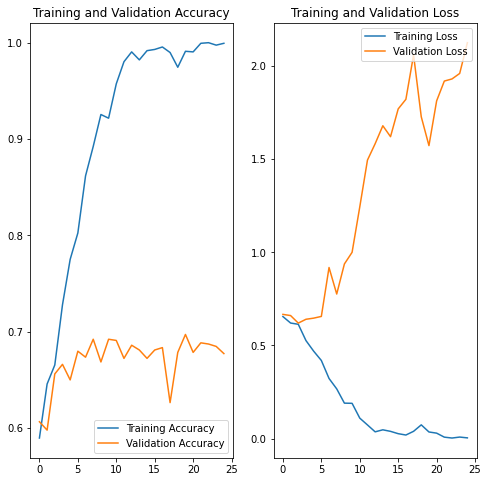

In [16]:
# Para evaluar el desempe~no del modelo.

acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
#ahora Predeciremos una imagen de un SHIBA para tener buena suerte en el mercadod e crypto
Shiba_image_path='C:\\Users\\Al_cstillo\\Desktop\\zou\\Intec\\mma\\TR5\\Optimizacion_1\\shib.jpg'
Shiba_image=Image.open('C:\\Users\\Al_cstillo\\Desktop\\zou\\Intec\\mma\\TR5\\Optimizacion_1\\shib.jpg')

In [18]:
image = tf.keras.preprocessing.image.load_img(Shiba_image_path)
image = image.resize((500,500))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = red_neuronal.predict(input_arr)

In [19]:
classes_num =np.argmax(predictions, axis = 1)
classes =[categorias[x] for x in classes_num]
classes

['dog']